In [102]:
#importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [2]:
#loading the data set
df=pd.read_csv("./loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Exploration

Loan_ID: Unique identification number for each loan application.
Gender: Gender of the applicant.
Married: Marital status of the applicant (Yes/No).
Dependents: Number of dependents of the applicant.
Education: Educational background of the applicant (Graduate/Not Graduate).
Self_Employed: Whether the applicant is self-employed (Yes/No).
ApplicantIncome: Income of the applicant.
CoapplicantIncome: Income of the co-applicant (if any).
LoanAmount: Amount of the loan applied for in thousands.
Loan_Amount_Term: Term/duration of the loan in months.
Credit_History: Credit history meets guidelines (1 for Yes, 0 for No).
Property_Area: Area where the property associated with the loan is located (Urban/Suburban/Rural).
Loan_Status: Loan approval status (Yes/No).

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
for i in df.columns:
    if i not in ['Loan_ID', 'ApplicantIncome','CoapplicantIncome','LoanAmount']:
        print(i, df[i].unique())

Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes' nan]
Loan_Amount_Term [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
Credit_History [ 1.  0. nan]
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


The dataset contains missing values (NaN) in several columns:

Gender: Missing values are present in this column, indicated as NaN.
Married: Some entries have missing values marked as NaN.
Dependents: NaN values are observed, specifically in entries representing the number of dependents and also 3+ should be replaced by somevalue.
Self_Employed: Some records have missing values denoted as NaN.
Loan_Amount_Term: This column exhibits missing values labeled as NaN, indicating the term of the loan in months is not available for certain entries.
Credit_History: Missing values (NaN) are noted in this column, which signifies whether the applicant's credit history meets the required guidelines.

NOW we should know how many  NaN values are there is them for this 


In [5]:
for i in df.columns:
    print(i,"contain null count",(df[i].isnull()).sum())

Loan_ID contain null count 0
Gender contain null count 13
Married contain null count 3
Dependents contain null count 15
Education contain null count 0
Self_Employed contain null count 32
ApplicantIncome contain null count 0
CoapplicantIncome contain null count 0
LoanAmount contain null count 22
Loan_Amount_Term contain null count 14
Credit_History contain null count 50
Property_Area contain null count 0
Loan_Status contain null count 0


# Data Preprocessing

### PROBLEMS IN DATASET

1)Missing Values:

Columns like 'Gender,' 'Married,' 'Dependents,' 'Self_Employed,' 'Loan_Amount_Term,' and 'Credit_History' contain missing values (NaN), requiring handling strategies like imputation or removal.
Categorical Encoding:

2)Proper encoding is needed for categorical variables such as 'Gender,' 'Married,' 'Dependents,' 'Education,' 'Self_Employed,' and 'Loan_Status' before using them in models.
Representation of 'Dependents':

3)The 'Dependents' column includes '3+' to represent '3 or more' dependents. It requires transformation to numeric format 

Replacing '3+' with '3':
Why??
Simplifies the data, converting it to a numeric format, which might be more straightforward for certain analyses or models.


In [6]:
df['Dependents']=df['Dependents'].replace('3+',3)


### Handling misssing values

Approach:
The approach involves identifying columns with binary values, typically represented as '0'/'1' or 'Yes'/'No,' and treating missing values within these columns through mode imputation.
Mode Imputation: Replace missing values with the mode (the most frequently occurring value) of the column.

In [7]:
df.columns
binary_columns=['Gender', 'Married', 'Dependents',
       'Self_Employed', 'Credit_History']
for i in binary_columns:
    df[i].fillna(df[i].mode()[0],inplace=True)
    print(i,df[i].isnull().sum())

    

Gender 0
Married 0
Dependents 0
Self_Employed 0
Credit_History 0


Determining whether to use the mean, median, or mode for imputing missing values in the 'LoanAmount' and 'Loan_Amount_Term' columns can depend on the characteristics of the data, especially its distribution and the presence of outliers.
Mean:
Use the mean when the data is approximately normally distributed and doesn’t contain significant outliers. It's sensitive to extreme values.
Median:
Choose the median if the data has outliers or is skewed. The median is robust against outliers and represents the central value in an ordered dataset.
Mode:
Opt for the mode when dealing with categorical or discrete numerical data where certain values are more frequent than others.

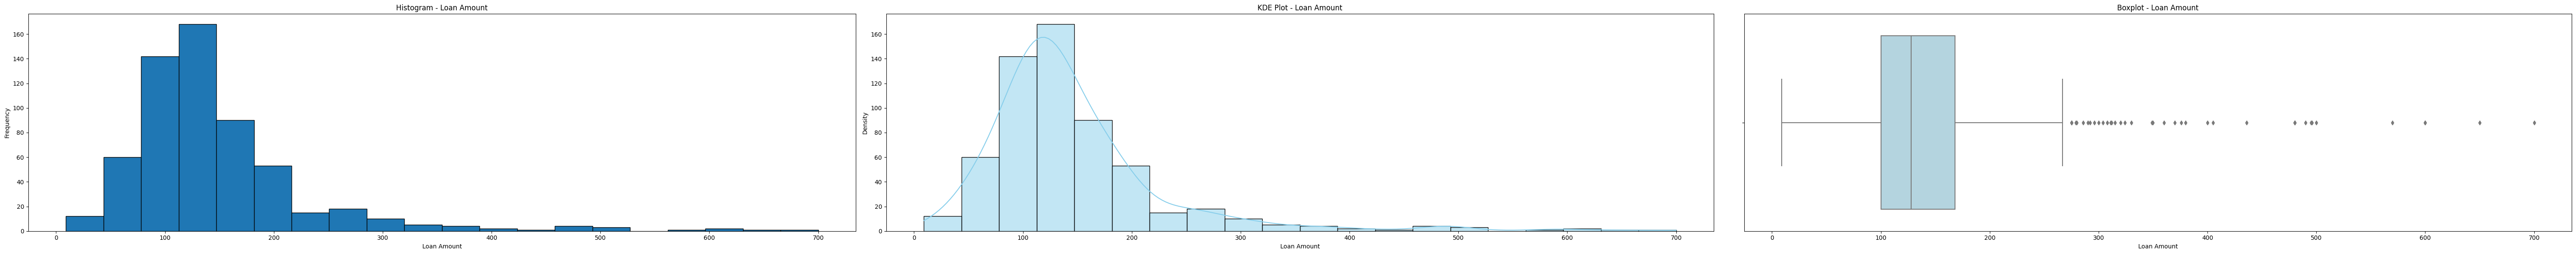

In [8]:


# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60, 6))

# Histogram
axes[0].hist(df['LoanAmount'], bins=20, edgecolor='black')
axes[0].set_title('Histogram - Loan Amount')
axes[0].set_xlabel('Loan Amount')
axes[0].set_ylabel('Frequency')

# KDE plot
sns.histplot(df['LoanAmount'], kde=True, bins=20, color='skyblue', ax=axes[1])
axes[1].set_title('KDE Plot - Loan Amount')
axes[1].set_xlabel('Loan Amount')
axes[1].set_ylabel('Density')

# Boxplot
sns.boxplot(x=df['LoanAmount'], color='lightblue', ax=axes[2])
axes[2].set_title('Boxplot - Loan Amount')
axes[2].set_xlabel('Loan Amount')

plt.tight_layout()
plt.show()


Right Skewed Distribution: A right-skewed distribution suggests that while most loans are smaller, there are a few instances of substantially larger loan amounts.
Replace null values with the median. The median is robust to outliers and won't heavily influence the skewed distribution.

In [9]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)


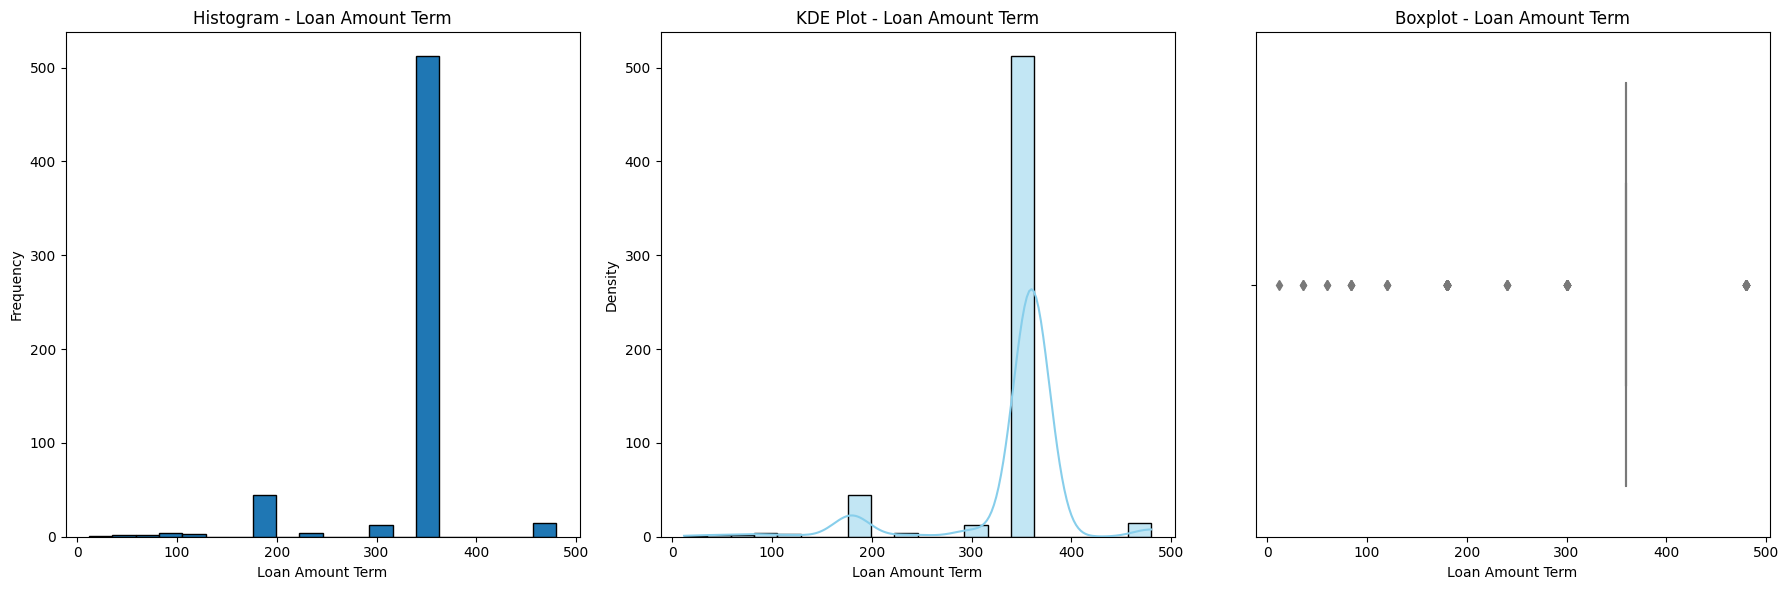

In [10]:
#for Loan_Amount_Term
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Histogram
axes[0].hist(df['Loan_Amount_Term'].dropna(), bins=20, edgecolor='black')
axes[0].set_title('Histogram - Loan Amount Term')
axes[0].set_xlabel('Loan Amount Term')
axes[0].set_ylabel('Frequency')

# KDE plot
sns.histplot(df['Loan_Amount_Term'].dropna(), kde=True, bins=20, color='skyblue', ax=axes[1])
axes[1].set_title('KDE Plot - Loan Amount Term')
axes[1].set_xlabel('Loan Amount Term')
axes[1].set_ylabel('Density')

# Boxplot
sns.boxplot(x=df['Loan_Amount_Term'].dropna(), color='lightblue', ax=axes[2])
axes[2].set_title('Boxplot - Loan Amount Term')
axes[2].set_xlabel('Loan Amount Term')

plt.tight_layout()
plt.show()


this should also be replaced by the median

In [11]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

### Now there are no missing values in the dataset 

'Loan_ID' serves as an identifier, often having no predictive power or correlation with the target variable ('Loan_Status').

In [12]:
df.drop('Loan_ID', axis=1, inplace=True)

Encoding Recommendations:
Gender, Married, Education, Self_Employed, Property_Area:

Label Encoding: These are categorical columns without an ordinal relationship. Using label encoding would be suitable.
Dependents:

Ordinal Encoding: As 'Dependents' seem to indicate the number of dependents, it might have an inherent order ('0' < '1' < '2' < '3+'). Hence, consider ordinal encoding to capture this order.
Loan_Status:

Label Encoding: As it represents the target variable (dependent variable) in classification tasks.
ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History:

No Encoding Needed: These columns are numerical and don't require encoding as they already contain numeric data.

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
columns_to_label_encode = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in columns_to_label_encode:
    df[col] = label_encoder.fit_transform(df[col])

In [14]:
# Assuming 'Dependents' mapping ('0' < '1' < '2' < '3+')
mapping = {'0': 0, '1': 1, '2': 2, '3': 3}
df['Dependents'] = df['Dependents'].replace(mapping)


In [15]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# HANDLING OUTLIERS

<Axes: >

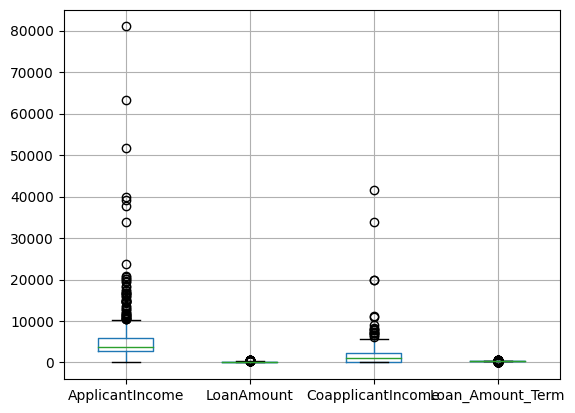

In [16]:
numeric_col = ['ApplicantIncome','LoanAmount', 'CoapplicantIncome', 'Loan_Amount_Term']
df.boxplot(numeric_col)
#plotting box plot to find out the whether outliers exist in our dataset or not 


Handling Outliers in 'ApplicantIncome'
Context:
The 'ApplicantIncome' column within the dataset contains various income values of loan applicants. Among these values, there exists an instance with an income of 80,000.

Evaluation:
The income value of 80,000, within the context of the dataset and the problem domain under consideration, is not inherently an outlier. Its presence aligns with the realistic income range for potential loan applicants, especially in specific professions or higher-income regions.

Data Visualization

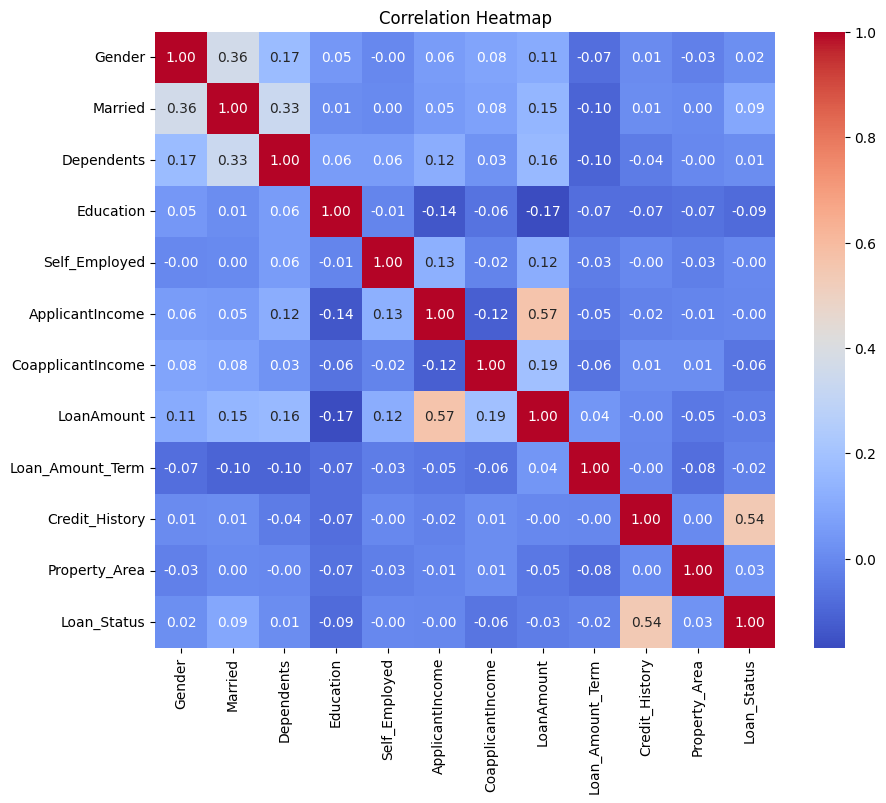

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show();



## Correlation Analysis: 'Credit History' and 'Loan Status'
The correlation analysis reveals a moderate positive correlation (0.54) between the 'Credit History' feature and the 'Loan Status' target variable within the dataset.

Insights:
Direction of Relationship:

As the 'Credit History' value increases, there is a tendency for a higher likelihood of loan approval ('Loan Status' being 'Y').
Predictive Power:

The moderate positive correlation suggests that 'Credit History' holds significance in predicting loan approval status.
'Credit History' emerges as an influential factor in determining 'Loan Status' and should be considered prominently during model building.
## Correlation Analysis: 'Loan Amount' and 'Applicant Income'
Interpretation:
The correlation analysis reveals a moderate positive correlation (0.57) between the 'Loan Amount' feature and the 'Applicant Income' feature within the dataset.

Insights:
Strength of Relationship:

A positive correlation coefficient of 0.57 indicates a moderate association between 'Loan Amount' and 'Applicant Income.'
Dependency Observation:

As 'Applicant Income' increases, there is a tendency for a higher 'Loan Amount' to be requested or 
The moderate positive correlation suggests a relationship where higher applicant incomes tend to seek or qualify for larger loan amounts.
## Correlation Analysis: 'Married' and 'Dependents'
Interpretation:
The correlation analysis indicates a moderate positive correlation (0.33) between the 'Married' feature and the 'Dependents' feature within the dataset.

Insights:
Strength of Relationship:

A positive correlation coefficient of 0.33 suggests a moderate association between 'Married' and 'Dependents.'
Dependency Observation:

The correlation infers that being 'Married' may be moderately associated with having a higher number of 'Dep
The moderate positive correlation implies a tendency for individuals who are 'Married' to potentially have a higher number of 'Dependents.'endents.'approved.

C:\Users\Yuvraj Singh Rathore\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


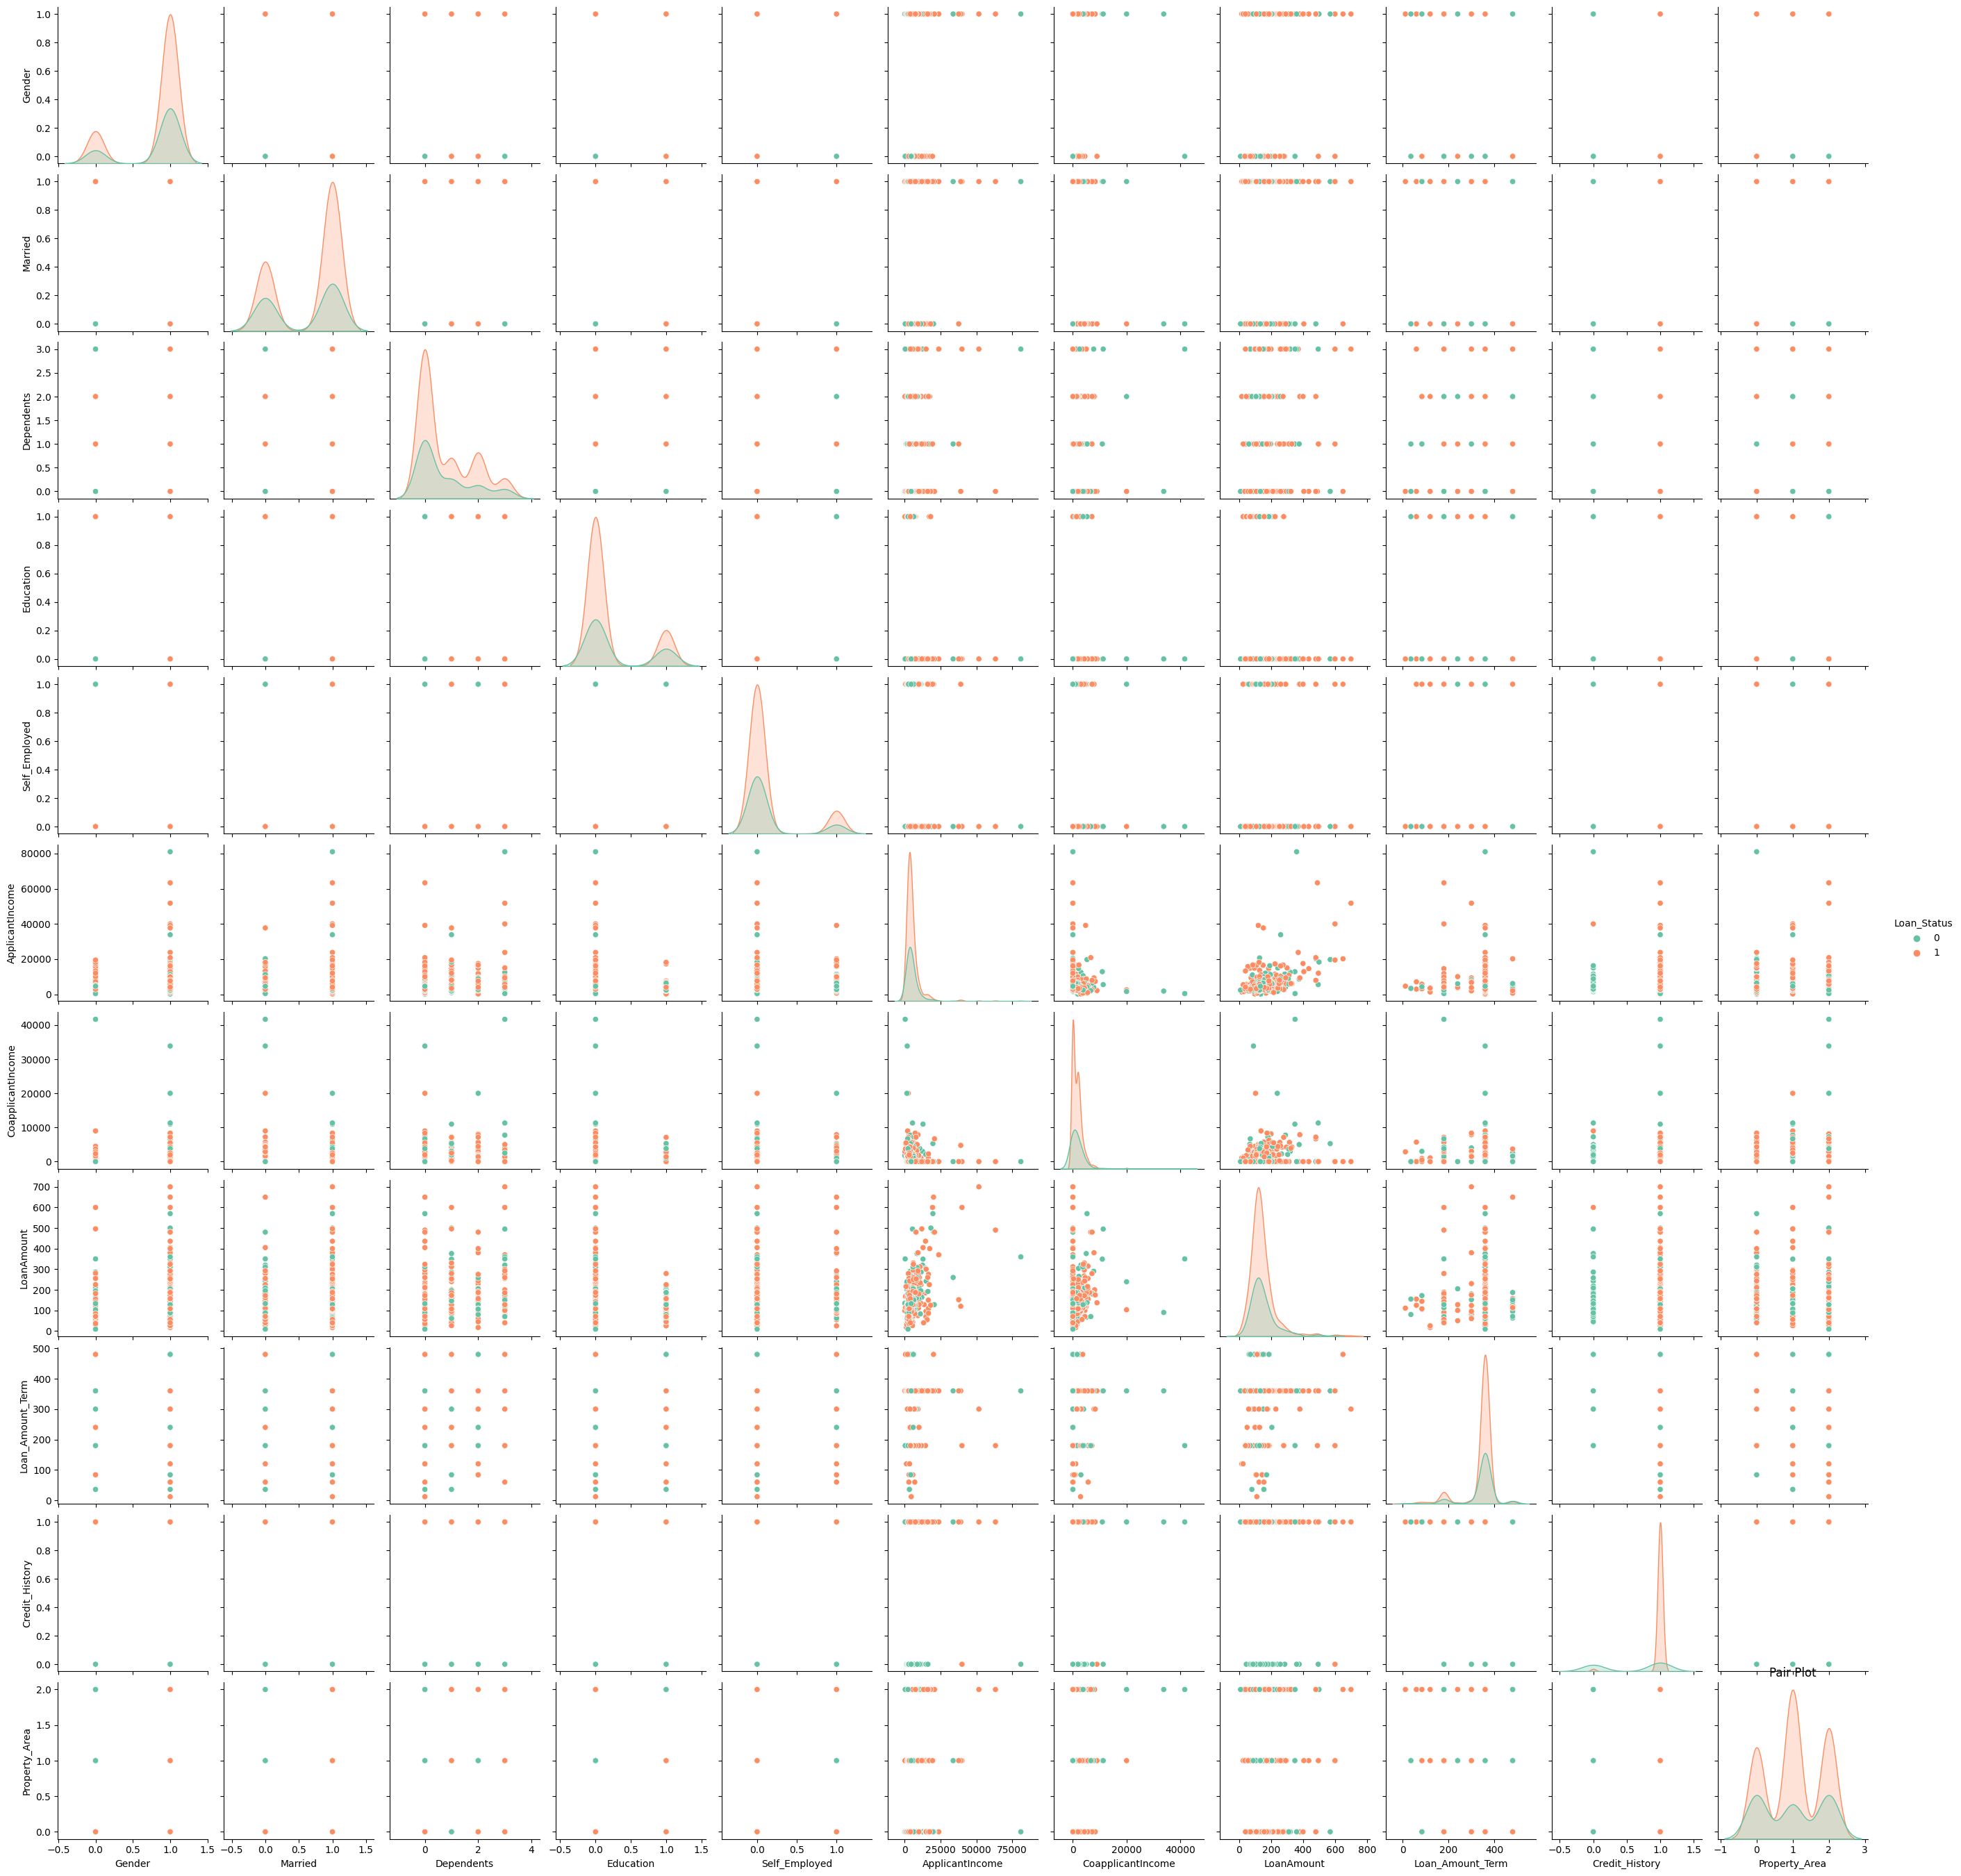

In [19]:
# Pair Plot
sns.pairplot(df, hue='Loan_Status', palette='Set2')
plt.title('Pair Plot')
plt.show();


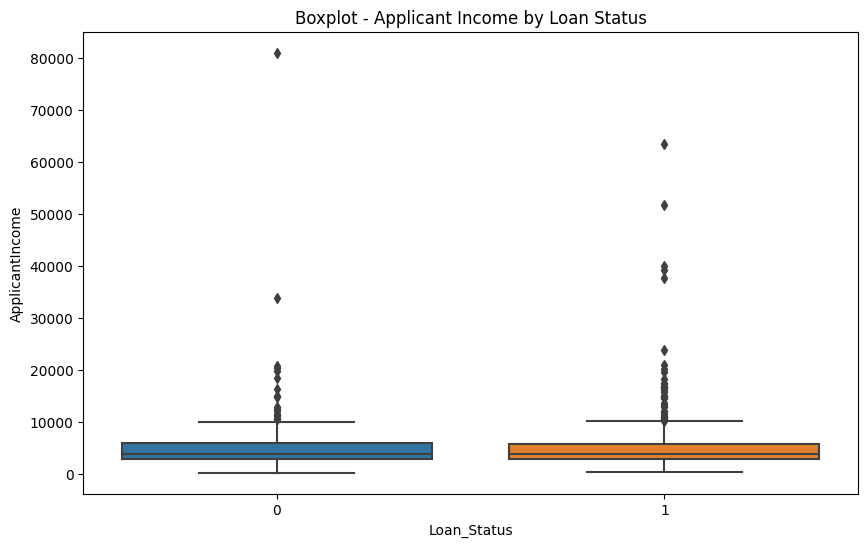

In [20]:
# Boxplot for Categorical vs. Numerical Feature
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Boxplot - Applicant Income by Loan Status')
plt.show()



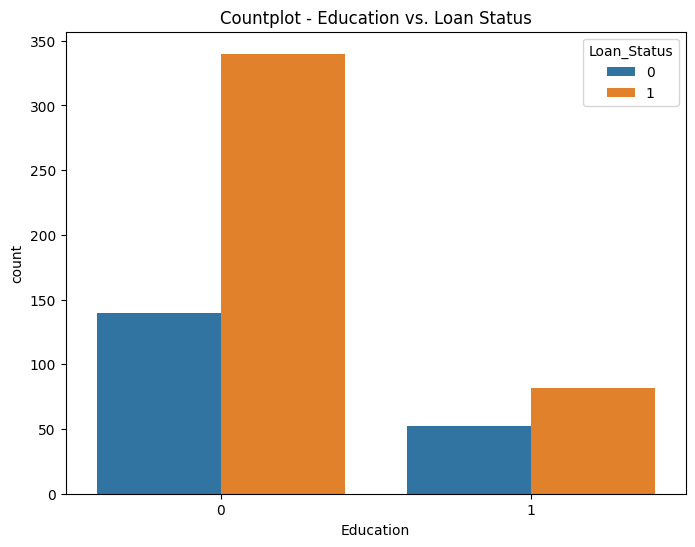

In [21]:
# Countplot for Categorical Feature
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Countplot - Education vs. Loan Status')
plt.show()



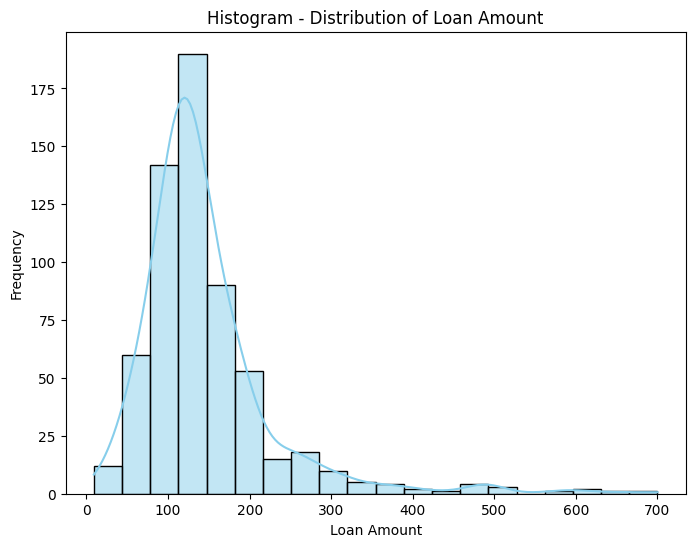

In [22]:
# Histogram for Numerical Feature
plt.figure(figsize=(8, 6))
sns.histplot(df['LoanAmount'].dropna(), kde=True, bins=20, color='skyblue')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Histogram - Distribution of Loan Amount')
plt.show()

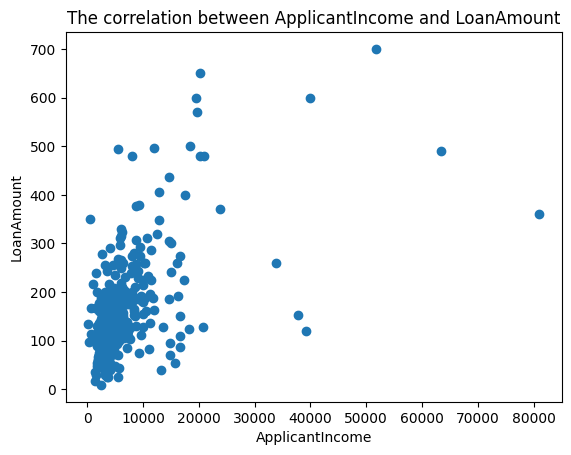

In [23]:
plt.scatter(x='ApplicantIncome',y='LoanAmount',data=df)
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('The correlation between ApplicantIncome and LoanAmount')
plt.show()

In [24]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# Feature Engineering

Assuming 'X' contains your features and 'y' contains the target variable
Replace 'X' and 'y' with your actual feature and target data

In [69]:
X=df.drop(columns=['Loan_Status'])
y=df['Loan_Status']
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [70]:


# Assuming 'X' contains your features and 'y' contains the target variable
# Replace 'X' and 'y' with your actual feature and target data

# Splitting the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 'test_size' specifies the proportion of the dataset to include in the test split (e.g., 0.2 for 20% test set)
# 'random_state' ensures reproducibility of the split; use a specific value for consistent results
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,1,1,0,0,0,6000,2250.0,265.0,360.0,1.0,1
90,1,1,0,0,0,2958,2900.0,131.0,360.0,1.0,1
227,1,1,2,0,0,6250,1695.0,210.0,360.0,1.0,1
482,1,1,0,0,0,2083,3150.0,128.0,360.0,1.0,1
464,1,0,0,0,0,4166,0.0,98.0,360.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,2,1,1,1875,1875.0,97.0,360.0,1.0,1
106,1,1,2,0,0,11417,1126.0,225.0,360.0,1.0,2
270,0,0,0,0,0,3237,0.0,30.0,360.0,1.0,2
435,0,1,0,0,0,10047,0.0,128.0,240.0,1.0,1


### Logistic Regression

In [71]:


# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are your training and testing sets

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model using the training sets
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Confusion Matrix:
[[18 25]
 [ 1 79]]


Accuracy: 0.69

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.53      0.55        43
           1       0.76      0.78      0.77        80

    accuracy                           0.69       123
   macro avg       0.66      0.65      0.66       123
weighted avg       0.69      0.69      0.69       123


Confusion Matrix:
[[23 20]
 [18 62]]


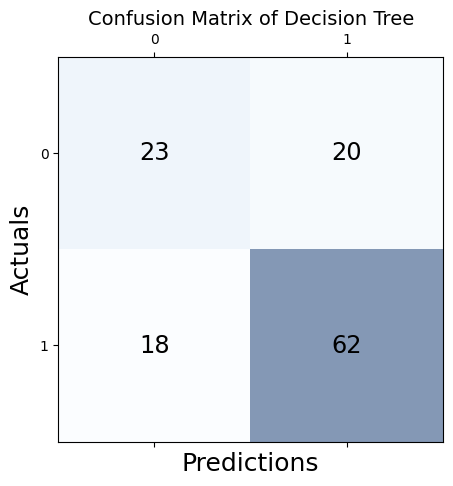

In [99]:


# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are your training and testing sets

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model using the training sets
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Decision Tree', fontsize=14)
plt.show()


Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123


Confusion Matrix:
[[18 25]
 [ 5 75]]


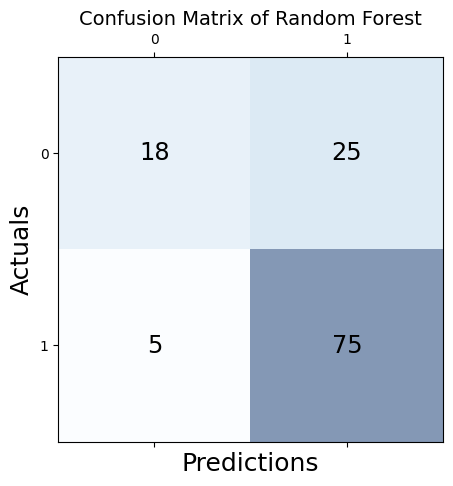

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are your training and testing sets

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the model using the training sets
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Random Forest', fontsize=14)
plt.show()


Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        43
           1       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123


Confusion Matrix:
[[18 25]
 [ 0 80]]


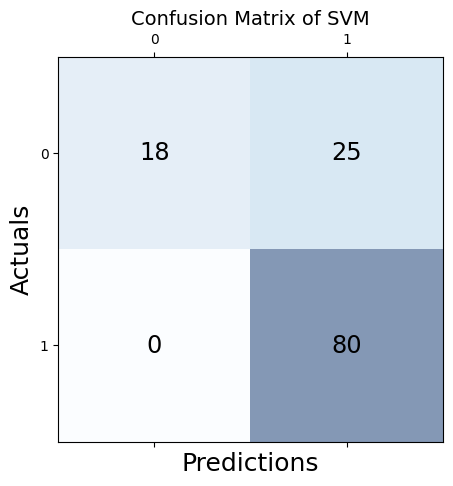

In [101]:


# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are your training and testing sets

# Initialize the Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can choose different kernels ('linear', 'rbf', 'poly', etc.)

# Train the model using the training sets
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of SVM', fontsize=14)
plt.show()
